In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set_style("ticks")

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn_pandas import DataFrameMapper, cross_val_score

In [2]:
df = pd.read_csv('https://query.data.world/s/d3gals7qk5sz9l2o50oirszif')
df = df.rename(columns={
        "Revenues (M)": "Revenues"
    })
df = df.assign(Revenues=df["Revenues"].apply(lambda x: float(x[1:].replace(",", ""))))
df["Mission"] = df["Mission"].fillna("")

In [3]:
df.head()

,Name,Rank,Revenues,Mission,Mission Link
0,Walmart,1,482130.0,"We save people money, so they can live better",http://corporate.walmart.com/
1,Exxon Mobil,2,246204.0,Exxon Mobil Corporation is committed to being ...,http://corporate.exxonmobil.com/en/company/abo...
2,Apple,3,233715.0,"Apple designs Macs, the best personal computer...",http://www.inc.com/jim-schleckser/apple-s-bori...
3,Berkshire Hathaway,4,210821.0,,NaN
4,McKesson,5,181241.0,"Together with our customers and partners, we a...",http://www.mckesson.com/about-mckesson/who-we-...


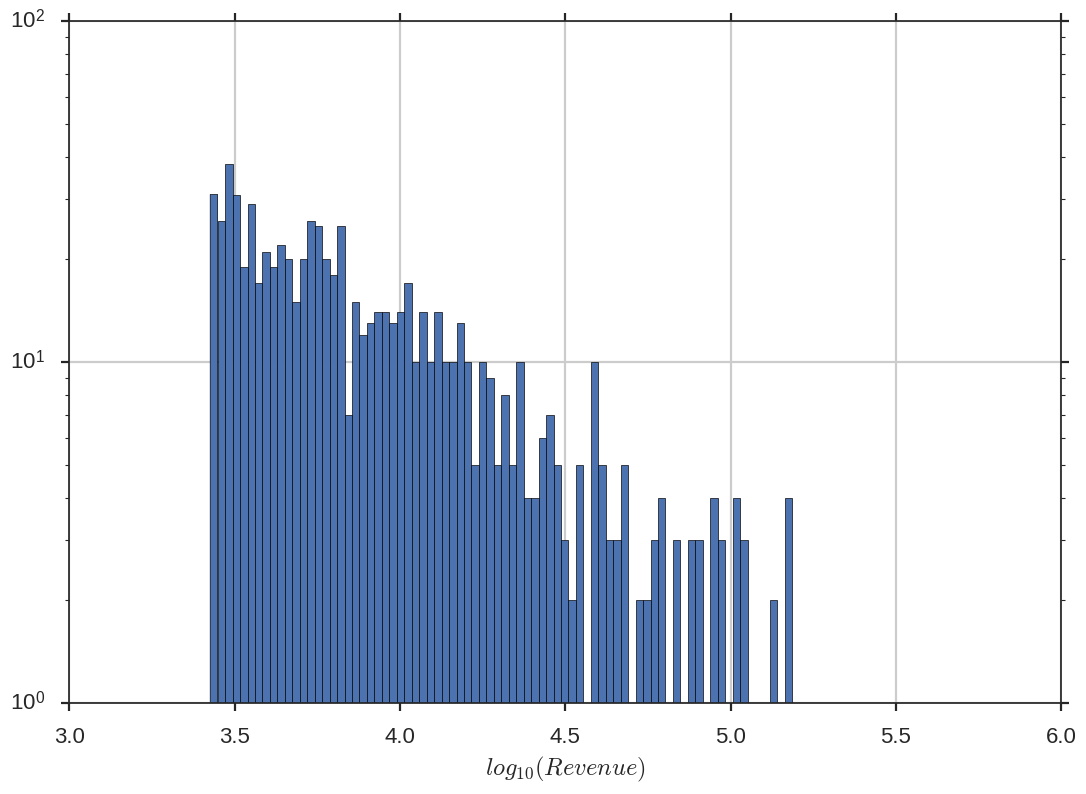

In [4]:
np.log10(df.Revenues).hist(bins=100, log=True)
plt.xlabel("$log_{10}(Revenue)$")

In [5]:
mapper = DataFrameMapper([
    ('Mission', [CountVectorizer(), TfidfTransformer()]),
])
mapper.fit(df)
X = mapper.transform(df)
y = df.Revenues

In [6]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

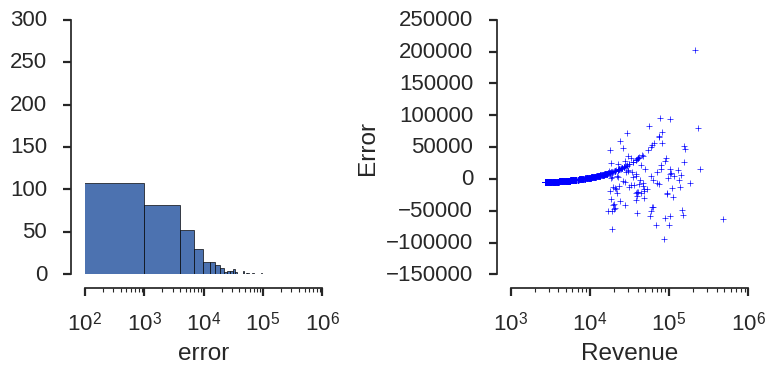

In [7]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(121)
ax.hist(y - y_pred, bins=100)
ax.set_xlabel("error")
ax.set_xscale("log")
ax = plt.subplot(122)
ax.scatter(y, y-y_pred, marker="+")
ax.set_xlabel("Revenue")
ax.set_ylabel("Error")
ax.set_xscale("log")
fig.tight_layout()
sns.despine(offset=10)